In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPool2D
from keras import backend as k

In [4]:
batch_size=128
num_classes=10
epochs=12


In [5]:
#input image dimentions
img_rows,img_cols=32,32

In [6]:
#load cifar dataset fro keras
from keras.datasets import cifar10

#download cifar10 data and split into train and test sets

(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

In [7]:
print('Training set images shape: {}'.format(xtrain.shape))
print('Testing set images shape: {}'.format(xtest.shape))

print('Training set labels shape: {}'.format(ytrain.shape))
print('Testing set labels shape: {}'.format(ytest.shape))

Training set images shape: (50000, 32, 32, 3)
Testing set images shape: (10000, 32, 32, 3)
Training set labels shape: (50000, 1)
Testing set labels shape: (10000, 1)


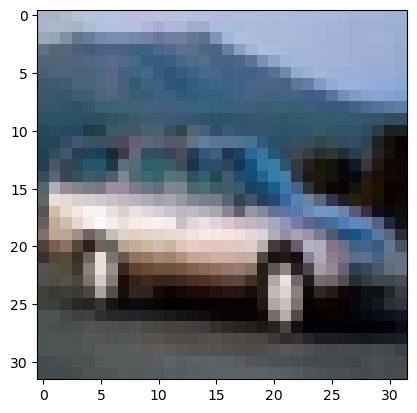

In [8]:
import matplotlib.pyplot as plt

plt.imshow(xtrain[4])

In [9]:
xtrain[0].shape

(32, 32, 3)

In [10]:
#reshape data to fit model
xtrain=xtrain.reshape(xtrain.shape[0],img_rows,img_cols,3)
xtest=xtest.reshape(xtest.shape[0],img_rows,img_cols,3)

print(xtrain.shape)
print(xtest.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [11]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

In [12]:
xtrain/=255
xtest/=255

In [13]:
print('xtrain shape:',xtrain.shape)
print(xtrain.shape[0],'train samples')
print(xtest.shape[0],'test samples')

xtrain shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [14]:
#convert class vectors to binary classes matrics

ytrain=keras.utils.to_categorical(ytrain)
ytest=keras.utils.to_categorical(ytest)

In [15]:
model=Sequential()

#add model layers
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(Dropout(0.2))

model.add(Conv2D(32,kernel_size=3,activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

#output layer
model.add(Dense(10,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 dropout (Dropout)           (None, 30, 30, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 10)                62730     
                                                        

In [17]:
#complie
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [18]:
result=model.fit(xtrain,ytrain,batch_size=batch_size,
                epochs=3,verbose=1,
                validation_data=(xtest,ytest))

Epoch 1/3
391/391 [==============================] - 98s 249ms/step - loss: 1.5545 - accuracy: 0.4471 - val_loss: 1.2533 - val_accuracy: 0.5574
Epoch 2/3
391/391 [==============================] - 111s 283ms/step - loss: 1.1816 - accuracy: 0.5897 - val_loss: 1.1271 - val_accuracy: 0.6093
Epoch 3/3
391/391 [==============================] - 125s 321ms/step - loss: 1.0422 - accuracy: 0.6393 - val_loss: 1.0542 - val_accuracy: 0.6356


In [19]:
score=model.evaluate(xtest,ytest,verbose=0)
print('Test Loss:',score[0])
print()
print('Test accuracy',score[1])

Test Loss: 1.0542246103286743

Test accuracy 0.6355999708175659


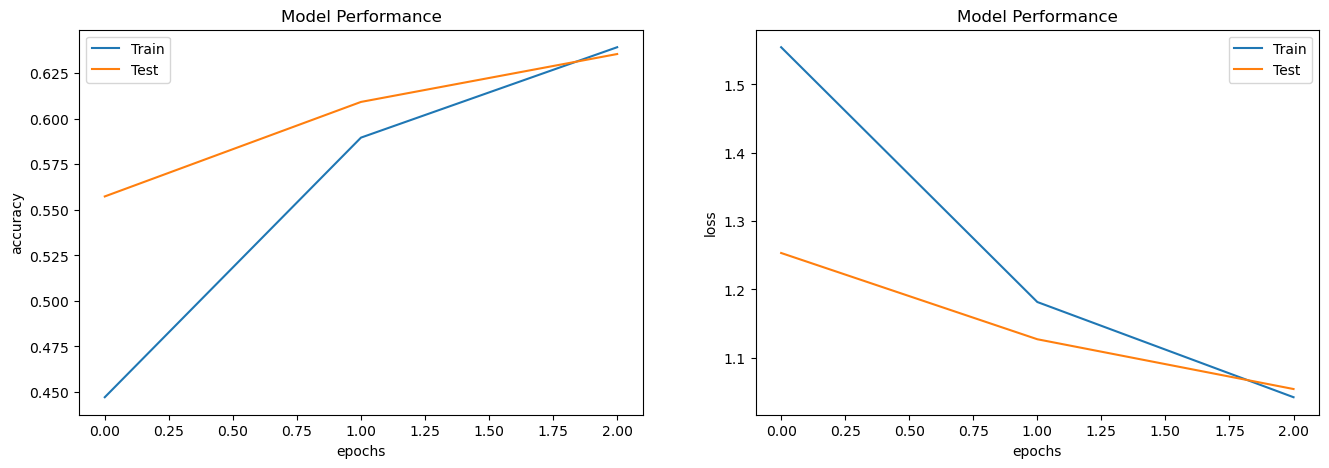

In [20]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(16,5))

ax1.plot(result.history['accuracy'])
ax1.plot(result.history['val_accuracy'])

ax1.set_title('Model Performance')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epochs')
ax1.legend(['Train','Test'])


ax2.plot(result.history['loss'])
ax2.plot(result.history['val_loss'])

ax2.set_title('Model Performance')
ax2.set_ylabel('loss')
ax2.set_xlabel('epochs')
ax2.legend(['Train','Test'])